Logs   
- [2024/05/21]    
  A Python implementation of various centrality for random geometric graphs.   
  This notebook is inspired by the image from Wikipedia
  https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Wp-01.png/599px-Wp-01.png


References:
- The first paper of betweenness centrality: (Freeman, 1977) - A Set of Measures of Centrality Based on Betweenness
- The short history of eigenvector centrality and its motivation for PageRank algorithm   
  (Sinn and Ziegler, 2022) - Landau on chess tournament and Google's PageRank
- PageRank centrality: (Brin and Page, 1998) - The anatomy of a large-scale hypertextual Web search engine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Generate a random geometric graph

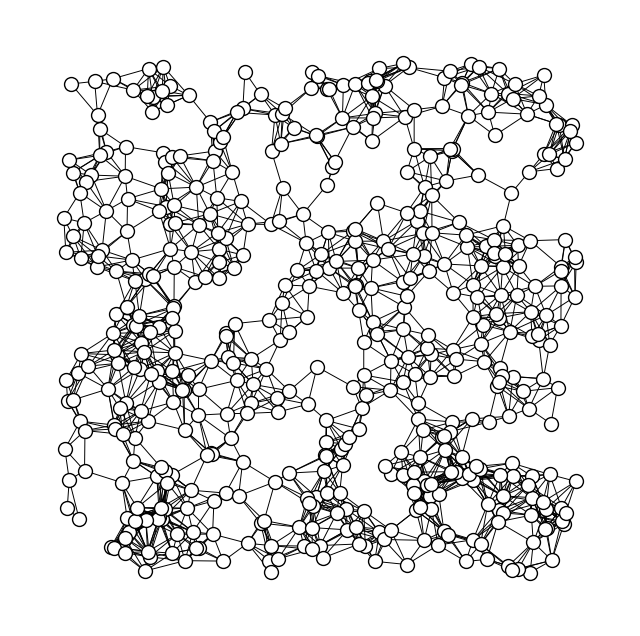

In [46]:
n = 500
seed = 24_05_21
radius = 0.08

G = nx.random_geometric_graph(n, radius, seed=seed)
pos = nx.get_node_attributes(G, "pos")

fig, ax = plt.subplots(figsize=(8, 8))

nx.draw(G, pos=pos, node_size=100, width=.7, edge_color="k", 
        node_color="w", edgecolors="k", linewidths=1, ax=ax)

plt.show(fig)

### Betweenness centrality

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs    
shortest paths that pass through $v$.
$$
  c_B(v) = \sum_{s, t \in V} \frac{\sigma(s, t | v)}{\sigma(s, t)}
$$
where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths,  
and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$   
other than $s, t$.   
If $s=t$, $\sigma(s, t) = 1$, and if $v \in s, t$ then $\sigma(s, t|v) = 0$

0.16048497404830833


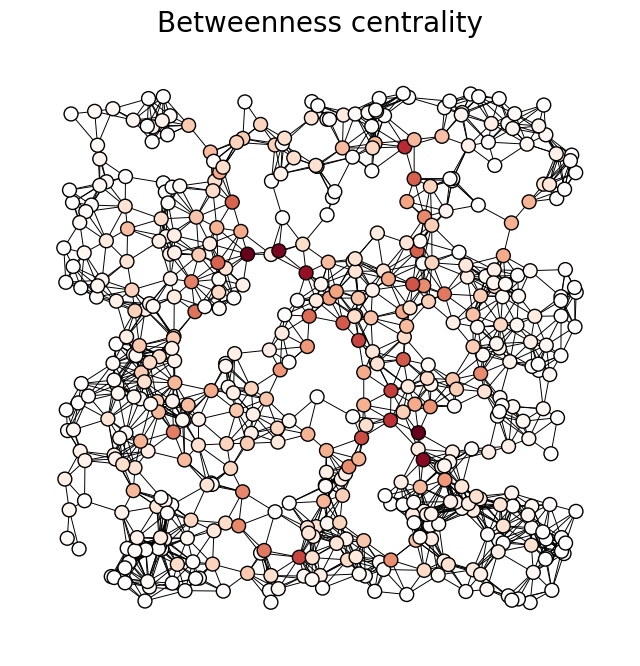

In [47]:
betweenness = nx.betweenness_centrality(G)

fig, ax = plt.subplots(figsize=(8, 8))

max_val = np.max(list(betweenness.values()))
print(max_val)
nx.draw(G, pos=pos, node_size=100, width=.7, edge_color="k", 
        edgecolors="k", linewidths=1, 
        nodelist=list(betweeness.keys()),
        node_color=list(betweeness.values()), cmap="RdGy_r", 
        vmin=-max_val, vmax=max_val, ax=ax)

ax.set_title("Betweenness centrality", fontsize=20)
plt.show(fig)

### Eigenvector centrality

I found this interpretation through the algorithm how to calculate the eigenvector  
is elucidating
[(Sacco, 2021) - Few but good, the eigenvector centrality and its meaning](
https://www.ancientworldmagazine.com/articles/few-good-eigenvector/)    

See `img-resources/network-analysis.drawio` for the exploration of this interpretation

0.25219136723278907


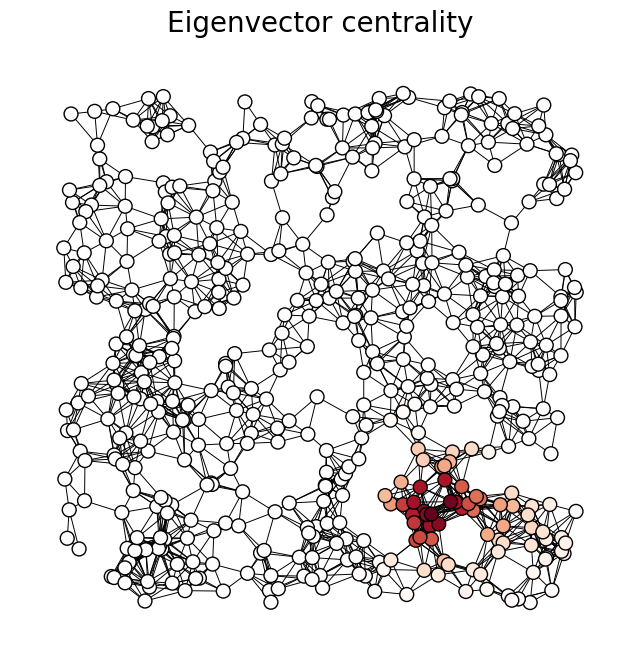

In [48]:
eigenvector = nx.eigenvector_centrality_numpy(G)

fig, ax = plt.subplots(figsize=(8, 8))

max_val = np.max(list(eigenvector.values()))
print(max_val)
nx.draw(G, pos=pos, node_size=100, width=.7, edge_color="k", 
        edgecolors="k", linewidths=1, 
        nodelist=list(eigenvector.keys()),
        node_color=list(eigenvector.values()), cmap="RdGy_r", 
        vmin=-max_val, vmax=max_val, ax=ax)

ax.set_title(f"Eigenvector centrality", fontsize=20)
plt.show(fig)

### PageRank centrality

This centrality is a development of eigenvector centrality.   
The following equation guides the PageRank centrality

$$
\begin{align*}
  &x_i = \alpha \sum_{j} a_{ij} \frac{x_j}{L_j} + \frac{1-\alpha}{N},  \\
  &L(j) = \sum_{i} \alpha_{ji}
\end{align*}
$$

$x_i$ is the PageRank centrality for the node $i$, and 
$\alpha \in [0, 1]$ is a damping factor that is set by the user.

0.003988092748613348


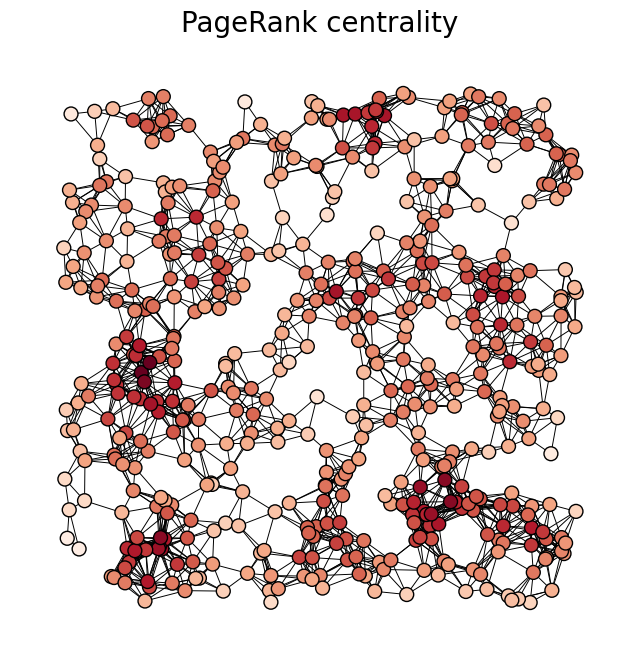

In [50]:
pagerank = nx.pagerank(G, alpha=1)

fig, ax = plt.subplots(figsize=(8, 8))

max_val = np.max(list(pagerank.values()))
print(max_val)
nx.draw(G, pos=pos, node_size=100, width=.7, edge_color="k", 
        edgecolors="k", linewidths=1, 
        nodelist=list(pagerank.keys()),
        node_color=list(pagerank.values()), cmap="RdGy_r", 
        vmin=-max_val, vmax=max_val, ax=ax)

ax.set_title(f"PageRank centrality", fontsize=20)
plt.show(fig)